# nlC5: Color Analysis Examples
* __Parametric Difference Equation imaging methods__ _in the context of the Escape Time Algorithm_
    * grayscale
    * map directly to HSV
    * color-map to RGB
    
#### Equation Definition Code:

In [3]:
#                               the file parametric_image.py is only a forgotton outline.
# import sys
# sys.path.insert(1, '../src')
# import parametric_image as parim
# daKine = parim.ParametricImage()

[python style g

In [4]:
""" get the external code files"""
import warnings
warnings.filterwarnings('ignore')

import os
import sys   
import numpy as np
import time

from IPython.display import display

sys.path.insert(1, '../src');
import z_plane as zp
import graphic_utility as gu;
import itergataters as ig
import numcolorpy as ncp

""" known parameter sets  """
tsty_92 = -1*np.array([0.035613765269, 1.218970084931, 0.709247225513, 1.087520531925, 0.290922668972],dtype=complex)

""" define the equation """
def nlc5(Z, p, Z0=None, ET=None):
    """ 
    Args:
        Z:    a real or complex number
        p:    a real of complex number
    Returns:
        Z:    the result (complex)
    """
    # Z = Z^(2*Z^(-c(1)^(Z^-c(2))^(Z^-c(3))^(Z^-c(4))^(Z^-c(5))))
    Z = Z**(2*Z**(p[0]**(Z**p[1])**(Z**p[2])**(Z**p[3])**(Z**p[4]) ))
    return Z

In [5]:
p = tsty_92
Z = 1 + 1j

# (Z^-c(5)) =    0.8806 - 0.2048i
# (Z^-c(4)) =    0.4506 - 0.5172i
# (Z^-c(4))^(Z^-c(5)) =    0.4703 - 0.3764i

print('Z**p[4] = ', Z**p[4])
print('Z**p[3] = ', Z**p[3])
print('(Z**p[3])**(Z**p[4]) = ', (Z**p[3])**(Z**p[4]))

Z**p[4] =  (0.8805924722320895-0.2047829049076141j)
Z**p[3] =  (0.45059991482615125-0.5172321862434783j)
(Z**p[3])**(Z**p[4]) =  (0.47032167554286286-0.3764281880743292j)


In [6]:
Z = 1 + 1j
# (Z^-c(5)) =    0.8806 - 0.2048i
# (Z^-c(4)) =    0.4506 - 0.5172i
# (Z^-c(4))^(Z^-c(5)) =    0.4703 - 0.3764i
# (Z^-c(3))^(Z^-c(4))^(Z^-c(5)) =    0.6859 - 0.0188i
print('Z**p[4] = ', Z**p[4])
print('Z**p[3] = ', Z**p[3])
print('(Z**p[3])**(Z**p[4]) = ', (Z**p[3])**(Z**p[4]))
print('(Z**p[2])**(Z**p[3])**(Z**p[4])', (Z**p[2])**(Z**p[3])**(Z**p[4]))

Z**p[4] =  (0.8805924722320895-0.2047829049076141j)
Z**p[3] =  (0.45059991482615125-0.5172321862434783j)
(Z**p[3])**(Z**p[4]) =  (0.47032167554286286-0.3764281880743292j)
(Z**p[2])**(Z**p[3])**(Z**p[4]) (0.7119683605186485-0.12181864359414447j)


In [7]:
# MATLAB equivalent
#     for n = 1:nc
#         Z = Z^(-1^n*exp(Z*c(n)));
#     end

Z = 1 + 1j
print(Z)
p = tsty_92
# Z = Z^(2*Z^(-c(1)^(Z^-c(2))^(Z^-c(3))^(Z^-c(4))^(Z^-c(5))))
Z = Z**(2*Z**(p[0]**(Z**p[1])**(Z**p[2])**(Z**p[3])**(Z**p[4])))
print(Z)
# MATLAB:
#    -1.0574 - 3.6002i
print('expected:\n', '-1.0574 - 3.6002i')

(1+1j)
(1.649684676052842+2.0194138123390384j)
expected:
 -1.0574 - 3.6002i


# Products of Escape Time Algorithm
* ET, Z, Z0 = get_primitives( [ (function-name, function-parameters ) ], complex_plane_definition)
    * Z0  = initial complex vector at each point (on the complex plane == the input image)
    * ET  = Escape Time at each point
    * Z   = final complex vector at each point

In [8]:
""" Define a complex plane point for each pixel """
par_set = {'n_rows': 200, 'n_cols': 300}
par_set['center_point'] = 0.0 + 0.0*1j
par_set['theta'] = 0 # 
par_set['zoom'] = 1/3

par_set['it_max'] = 64
par_set['max_d'] = 10 / par_set['zoom']
par_set['dir_path'] = os.getcwd()

""" Define the function handle and numerical parameter set """
list_tuple = [(nlc5, (tsty_92))]
t0 = time.time()

""" Get the primitive products of the calculation """
ET_sm, Z_sm, Z0_sm = ig.get_primitives(list_tuple, par_set)
print(time.time() - t0, '\t calculate primitives total time')

2.126610279083252 	 calculate primitives total time


# Normalized number planes for use as image color values
* Zd, Zr, ETn = etg_norm(Z0, Z, ET)
    * Zd  = distance at ET
    * Zr  = rotation at ET
    * ETn = ET

In [9]:
""" Normalize """
t0 = time.time()
Zd_sm, Zr_sm, ETn_sm = ncp.etg_norm(Z0_sm, Z_sm, ET_sm)
print(time.time() - t0, '\t normalize primitives to color values')

0.15679407119750977 	 normalize primitives to color values


# Grayscale
* D = mat_to_gray(Zd, max_v=255, min_v=64)
    * normalized number plane
    * (optional) grascale parameters

0.3834691047668457 	 grayscale converstion time


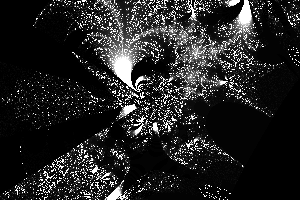

In [10]:
""" Number of iterations for each Vector at Escape Time as a full range grayscale  """
t0 = time.time()
ETd = ncp.mat_to_gray(ETn_sm)
print(time.time() - t0, '\t grayscale converstion time')
display(ETd)

0.42185091972351074 	 grayscale converstion time


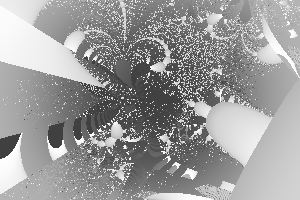

In [11]:
""" Vector Distance at Escape Time as a full range grayscale  """
t0 = time.time()
D = ncp.mat_to_gray(Zd_sm, max_v=255, min_v=64)
print(time.time() - t0, '\t grayscale converstion time')
display(D)

0.4068779945373535 	 grayscale converstion time


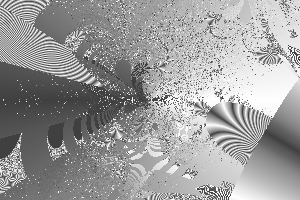

In [12]:
""" Vector Rotation at Escape Time as a full range grayscale  """
t0 = time.time()
R = ncp.mat_to_gray(Zr_sm, max_v=255, min_v=64)
print(time.time() - t0, '\t grayscale converstion time')
display(R)

# Hue Saturation Value: HSV direct
* Ihsv = rgb_2_hsv_mat(H, S, V)
    * H = ncp.range_norm(Zr - Zd, lo=0.5, hi=0.85)
    * S = ncp.range_norm(1 - ETn, lo=0.0, hi=0.9)
    * V = ncp.range_norm(ETn, lo=0.0, hi=1.0)

0.8361239433288574 	 HSV converstion time


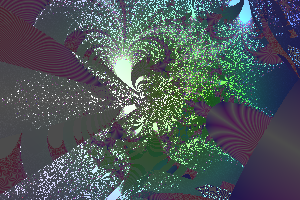

In [13]:
""" number one of two functions 
    (both examples using Distance, Rotation and ET as H,S,V) """
t0 = time.time()
H = ncp.range_norm(Zd_sm, lo=0.25, hi=0.95)
S = ncp.range_norm(Zr_sm, lo=0.0, hi=0.7)
V = ncp.range_norm(ETn_sm, lo=0.3, hi=1.0)
Ihsv = ncp.rgb_2_hsv_mat(H, S, V)
print(time.time() - t0, '\t HSV converstion time')
display(Ihsv)

0.8572390079498291 	 HSV converstion time


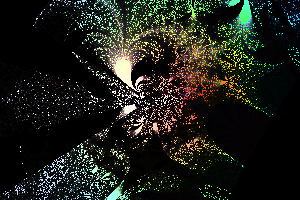

In [14]:
""" number 2 of two functions
    (using using Distance, Rotation and ET as full range H, S, V) """
t0 = time.time()
H2 = ncp.range_norm(Zd_sm)
S2 = ncp.range_norm(Zr_sm)
V2 = ncp.range_norm(ETn_sm)
I_hsv2 = ncp.normat_hsv_intrgb(H2, S2, V2, H_max=1.0, H_min=0.0, S_max=1.0, S_min=0.0, V_max=1.0, V_min=0.0)
print(time.time() - t0, '\t HSV converstion time')
display(I_hsv2)

# Color-mapped
* I_mapped = mat_to_mapped(Zd, mp)
    * Zd converted to index of unique values
    * mp will be resized to number of unique values in Zd

0.3043639659881592 	 HSV converstion time


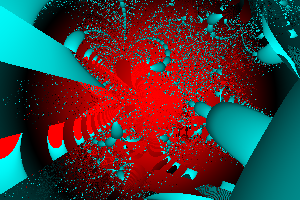

In [15]:
""" Color map example: Red to Black to Blue-Green """
t0 = time.time()
mp = np.array([[1.0, 0.0, 0.0],[0.0, 0.0, 0.0],[0.0, 1.0, 1.0]])
I_rgb = ncp.mat_to_mapped(Zd_sm, mp)
print(time.time() - t0, '\t HSV converstion time')
display(I_rgb)

## Interesting numerical factoid section:

ET =	 2


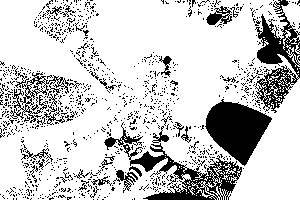

ET =	 3


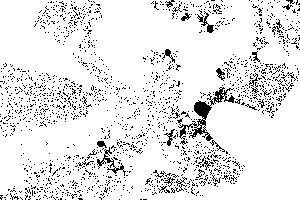

ET =	 4


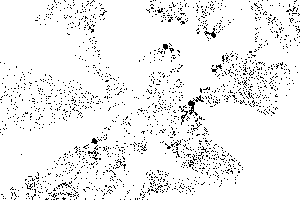

ET =	 5


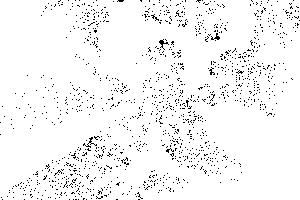

ET =	 6


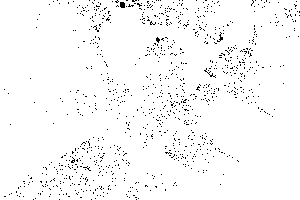

ET =	 7


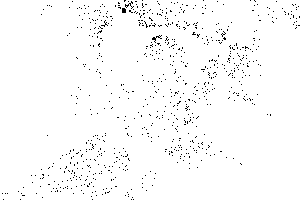

ET >	 8


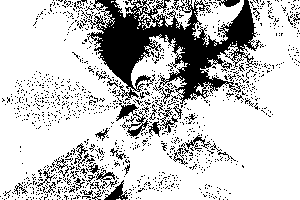

In [16]:
"""  Time-Point of Escape individual escape time points for each escape time
     Animations possible  """
lo_ET = 2
hi_ET = lo_ET + 6
for t in range(lo_ET, hi_ET):
    print('ET =\t',t)
    I = np.ones(ET_sm.shape)
    I[ET_sm == t] = 0
    display(ncp.mat_to_gray(I))
I = np.ones(ET_sm.shape)
I[ET_sm > hi_ET] = 0
print('ET >\t',hi_ET)
display(ncp.mat_to_gray(I))

In [17]:
"""  number of points escaped at each iteration: escape time frequency  """
Total_Points = ET_sm.shape[0] * ET_sm.shape[1]
print('\t\t%i remain in orbit after %i iterations\n'%((ET_sm > (ET_sm.max()-1)).sum(),  ET_sm.max()))
print('%3s) %10s\n'%('ET', 'Escaped'))
t_esc = 0
for k in range(1,int(ET_sm.max())):
    print('%3i) %7i'%(k, (ET_sm == k).sum()))
    t_esc += (ET_sm == k).sum()

print('\n(in)Sanity check:\n%i Total points\n%i Escaped\n%i Remain'%(Total_Points, t_esc, Total_Points - t_esc))

		5041 remain in orbit after 65 iterations

 ET)    Escaped

  1)   19019
  2)   12522
  3)    5686
  4)    3582
  5)    2333
  6)    1592
  7)    1182
  8)     875
  9)     732
 10)     622
 11)     548
 12)     499
 13)     416
 14)     401
 15)     332
 16)     352
 17)     311
 18)     304
 19)     234
 20)     233
 21)     236
 22)     181
 23)     167
 24)     191
 25)     133
 26)     139
 27)     138
 28)     121
 29)     105
 30)     117
 31)      92
 32)     100
 33)     102
 34)     105
 35)      77
 36)      89
 37)      72
 38)      78
 39)      48
 40)      55
 41)      64
 42)      48
 43)      52
 44)      39
 45)      40
 46)      51
 47)      35
 48)      35
 49)      47
 50)      36
 51)      29
 52)      40
 53)      36
 54)      33
 55)      29
 56)      32
 57)      32
 58)      24
 59)      18
 60)      27
 61)      22
 62)      18
 63)      23
 64)      28

(in)Sanity check:
60000 Total points
54959 Escaped
5041 Remain


In [18]:
""" partial list of unescaped starting points (look for orbit points) """
Z_overs = Z0_sm[ET_sm == ET_sm.max()]

v1 = Z_overs[0]
d = '%0.2f'%(np.abs(v1))
theta = '%0.1f'%(180*np.arctan2(np.imag(v1), np.real(v1))/np.pi)
print('Unescaped Vector:\n\tV = ', d, theta, 'degrees\n')

print('%9d'%Z_overs.size, 'total unescaped points\n')
print('%9s'%('points'), 'near V', '      (plane units)')
for denom0 in range(1,12):
    neighbor_distance = np.abs(v1) * 1/denom0
    v1_list = Z_overs[np.abs(Z_overs-v1) < neighbor_distance]
    print('%9d'%len(v1_list), 'within V/%2d  (%0.3f)'%(denom0, neighbor_distance))

Unescaped Vector:
	V =  4.18 134.1 degrees

     5041 total unescaped points

   points near V       (plane units)
     1963 within V/ 1  (4.176)
      344 within V/ 2  (2.088)
      132 within V/ 3  (1.392)
       67 within V/ 4  (1.044)
       42 within V/ 5  (0.835)
       29 within V/ 6  (0.696)
       24 within V/ 7  (0.597)
       22 within V/ 8  (0.522)
       17 within V/ 9  (0.464)
       15 within V/10  (0.418)
       13 within V/11  (0.380)


In [19]:
import warnings
warnings.filterwarnings('ignore')

import os
import sys
import numpy as np
import time

from IPython.display import display

sys.path.insert(1, '../src');
import z_plane as zp
import graphic_utility as gu;
import itergataters as ig
import numcolorpy as ncp

In [20]:
plane=zp.ComplexPlane()

In [21]:
plane.display_self()
parameters_dict = plane.get_parameters_dict()


    center_point: 0
          n_cols: 5
          n_rows: 5
           theta: 0
     zoom_factor: 1



In [22]:

import os
import time
import yaml
from inspect import getmembers, isfunction, getsource, signature, isclass

conscientious_message = 'USER MISTAKE -- NOT AN ERROR'

def display_module_functions(imported_module, show_imported_functions=False):
    """ Usage: display_module_functions(any_module) 
    Args:
        imported_module:         an imported python module
        show_imported_functions: default is False - ignore imported functions
        
    """
    ignore_functions_list = ['getmembers', 'isfunction', 'getsource', 'signature']

    functions_list = [o for o in getmembers(imported_module) if isfunction(o[1])]
    source_list = [getsource(o[1]) for o in getmembers(imported_module) if isfunction(o[1])]    
    
    if len(source_list) != len(functions_list): return  #       This should not be possible
    
    for list_number in range(len(functions_list)):
        function_tuple = functions_list[list_number]    
        if function_tuple[0] in ignore_functions_list:
            if show_imported_functions == True:
                print('using: %s%s'%(function_tuple[0], signature(function_tuple[1])))
        else:
            source_str = source_list[list_number]
            docs_string = None
            try:
                docs_string = source_str.split('"""')[1]
            except:
                pass

            print('def %s%s'%(function_tuple[0], signature(function_tuple[1])))
            if docs_string is None:
                print('doc_missing\n')
            else:
                print(docs_string,'\n')
                
                
    class_list = [o for o in getmembers(imported_module) if isclass(o[1])]
    class_source_list = [getsource(o[1]) for o in getmembers(imported_module) if isclass(o[1])]
    for list_number in range(len(class_list)):
        class_tuple = class_list[list_number]    
        source_str = class_source_list[list_number]
        docs_string = None
        try:
            docs_string = source_str.split('"""')[1]
        except:
            pass

        print('def %s'%(class_tuple[0]))
        if docs_string is None:
            print('doc_missing\n')
        else:
            print(docs_string,'\n')

In [23]:
# show the functions available in the module written from this notebook:
display_module_functions(zp, show_imported_functions=True)

def complex_frame_dict_to_string(frame_dict, N_DEC=4)
 get a formatted list of strings  

def complex_to_string(z, N_DEC=6)
 format single complex number to string with n decimal places  

def get_aligned_dict_string(d, N_DEC=3)
 pretty_string = z_plane.get_aligned_dict_string(d, N_DEC=3)  

def get_complex_frame(CP, ZM, theta, h=1, w=1)
 get the complex numbers at ends and centers of a frame   

def get_frame_from_dict(def_dict)
 complex_frame, def_dict = get_frame_from_dict(def_dict)
        legacy wrapper function.
    Args:
        def_dict: definition dictionary with keys:
                    'center_point', 'zoom', 'theta', 'n_rows', 'n_cols'
    Returns:
        complex_frame:
        def_dict:
     

def rnd_lambda(s=1)
 random parameters s.t. a*d - b*c = 1  

def show_complex_matrix(Z0, N_DEC=3)
 display a complex matrix or array  

def ComplexPlane
                         parameterized grid of complex numbers
    Args:
        CP:                     self._center_point    --